In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/workspaces/Laptop_Price_Predictor/data/raw/laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3976 non-null   int64 
 1   Brand            3976 non-null   object
 2   Name             3976 non-null   object
 3   Price            3976 non-null   int64 
 4   Processor_Name   3976 non-null   object
 5   Processor_Brand  3976 non-null   object
 6   RAM_Expandable   3976 non-null   object
 7   RAM              3976 non-null   object
 8   RAM_TYPE         3976 non-null   object
 9   Ghz              3976 non-null   object
 10  Display_type     3976 non-null   object
 11  Display          3976 non-null   object
 12  GPU              3968 non-null   object
 13  GPU_Brand        3972 non-null   object
 14  SSD              3976 non-null   object
 15  HDD              3976 non-null   object
 16  Adapter          3976 non-null   object
 17  Battery_Life     3558 non-null   

In [10]:
df.shape

(3976, 18)

In [11]:
df.dtypes

Unnamed: 0          int64
Brand              object
Name               object
Price               int64
Processor_Name     object
Processor_Brand    object
RAM_Expandable     object
RAM                object
RAM_TYPE           object
Ghz                object
Display_type       object
Display            object
GPU                object
GPU_Brand          object
SSD                object
HDD                object
Adapter            object
Battery_Life       object
dtype: object

In [12]:
df.isnull().sum()

Unnamed: 0           0
Brand                0
Name                 0
Price                0
Processor_Name       0
Processor_Brand      0
RAM_Expandable       0
RAM                  0
RAM_TYPE             0
Ghz                  0
Display_type         0
Display              0
GPU                  8
GPU_Brand            4
SSD                  0
HDD                  0
Adapter              0
Battery_Life       418
dtype: int64

In [13]:
df.describe()

,Unnamed: 0,Price
count,3976.000000,3976.000000
mean,2181.495724,72432.528672
std,1297.029657,52207.650948
min,0.000000,7990.000000
25%,1058.750000,39873.250000
50%,2098.500000,58990.000000
75%,3342.250000,84990.000000
max,4408.000000,503890.000000


In [14]:
df.describe(include='object')

,Brand,Name,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
count,3976,3976,3976,3976,3976,3976,3976,3976,3976,3976,3968,3972,3976,3976,3976,3558
unique,31,3941,125,19,10,20,19,31,2,34,300,11,19,8,68,191
top,ASUS,Lenovo IdeaPad Flex 5 14IRU8 (82Y00051IN) Lapt...,Intel Core i5 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,65,65W Adapter
freq,989,2,316,3009,2157,1608,1505,331,2034,2205,651,1939,1931,3014,1458,803


In [17]:
for col in df.columns:
  print(f"{col}:{df[col].nunique()} unique values")

Unnamed: 0:3976 unique values
Brand:31 unique values
Name:3941 unique values
Price:1799 unique values
Processor_Name:125 unique values
Processor_Brand:19 unique values
RAM_Expandable:10 unique values
RAM:20 unique values
RAM_TYPE:19 unique values
Ghz:31 unique values
Display_type:2 unique values
Display:34 unique values
GPU:300 unique values
GPU_Brand:11 unique values
SSD:19 unique values
HDD:8 unique values
Adapter:68 unique values
Battery_Life:191 unique values


In [18]:
df['Brand'].value_counts()

Brand
ASUS         989
Lenovo       811
HP           803
Dell         420
Acer         322
MSI          316
Samsung       61
Apple         49
Infinix       39
Microsoft     34
AVITA         23
Gigabyte      17
LG            15
Honor         14
iball         11
Xiaomi        10
Fujitsu        8
Zebronics      8
Wings          4
Colorful       3
Realme         3
Micromax       3
Coconics       3
Tecno          2
Smartron       2
Huawei         1
Razer          1
VAIO           1
Lava           1
Nokia          1
RDP            1
Name: count, dtype: int64

In [21]:
df['Processor_Name'].value_counts()

Processor_Name
Intel Core i5 (11th Gen)           316
Intel Core i5 (12th Gen)           294
AMD Hexa-Core Ryzen 5              245
AMD Octa-Core Ryzen 7              239
Intel Core i3 (11th Gen)           189
                                  ... 
Microsoft SQ1 Processor              1
AMD Dual-Core A9 APU Processor       1
AMD Octa-Core Ryzen 9 Processor      1
1.9 Ghz Processor                    1
2.6 Ghz Processor                    1
Name: count, Length: 125, dtype: int64

In [22]:
df['RAM'].value_counts()

RAM
8 GB          1608
16 GB         1088
4 GB           547
16 GB LP       299
8 GB LP        182
32 GB           88
32 GB LP        48
4 GB LP         36
2 GB            24
16 GB RAM       16
8 GB RAM        14
64 GB            6
12 GB            6
16 GB RAM        5
32 GB RAM        3
3 GB             2
18 GB RAM        1
36 GB RAM        1
24 GB            1
6 GB             1
Name: count, dtype: int64

In [23]:
df['SSD'].value_counts()

SSD
512 GB SSD Storage     1931
NO SSD                  664
1024 GB SSD Storage     591
256 GB SSD Storage      356
256 GB SSD Storage      205
128 GB SSD Storage       57
128 GB SSD Storage       48
2048 GB SSD Storage      34
32 GB SSD Storage        25
64 GB SSD Storage        23
512 GB SSD Storage       16
16 GB SSD Storage        12
8 GB SSD Storage          5
512  SSD Storage          2
16 GB SSD Storage         2
256  SSD Storage          2
1 GB SSD Storage          1
4098 GB SSD Storage       1
32 GB SSD Storage         1
Name: count, dtype: int64

In [19]:
df['Battery_Life'].unique()

array([' Upto 12 Hrs Battery Life', ' Upto 11 Hrs Battery Life',
       ' Upto 10 Hrs Battery Life', 'Upto 7.30 Hrs Battery Life',
       ' Upto 8 Hrs Battery Life', '45W Adapter',
       ' Upto 9 Hrs Battery Life', '150W Adapter',
       ' Upto 9.5 Hrs Battery Life', ' Upto 7 Hrs Battery Life',
       '230W Adapter', ' Upto 9.45 Hrs Battery Life',
       'Upto 7 Hrs Battery Life', ' Upto 6 Hrs Battery Life',
       ' Upto 17.5 Hrs Battery Life', '135W Adapter',
       'Upto 6.5 Hrs Battery Life', nan, '65W Adapter',
       'Upto 5 Hrs Battery Life', 'Upto 10 Hrs Battery Life',
       ' Upto 4 Hrs Battery Life', ' Upto 6.5 Hrs Battery Life',
       ' Upto 5 Hrs Battery Life', '90W Adapter',
       ' Upto 21 Hrs Battery Life', 'Upto 6 Hrs Battery Life',
       ' Upto 14.7 Hrs Battery Life', ' Upto 13 Hrs Battery Life',
       '52.5W Adapter', '180W Adapter', '41W Adapter', '45 / 65W Adapter',
       ' Upto 15 Hrs Battery Life', '120W Adapter',
       ' Upto 18 Hrs Battery Life', ' Upto 

In [24]:
df['RAM'].unique()

array(['4 GB ', '8 GB ', '16 GB ', '8 GB LP', '16 GB LP', '4 GB LP',
       '32 GB LP', '8 GB RAM', '16 GB RAM ', '32 GB ', '16 GB RAM',
       '18 GB RAM', '32 GB RAM', '64 GB ', '12 GB ', '36 GB RAM', '2 GB ',
       '24 GB ', '6 GB ', '3 GB '], dtype=object)

In [25]:
df['SSD'].unique()

array(['64 GB SSD Storage', '512 GB SSD Storage', 'NO SSD',
       '1024 GB SSD Storage', '256 GB SSD Storage', '256 GB SSD Storage ',
       '128 GB SSD Storage', '128 GB SSD Storage ', '512 GB SSD Storage ',
       '512  SSD Storage', '2048 GB SSD Storage', '1 GB SSD Storage',
       '8 GB SSD Storage ', '16 GB SSD Storage ', '32 GB SSD Storage',
       '16 GB SSD Storage', '256  SSD Storage ', '4098 GB SSD Storage',
       '32 GB SSD Storage '], dtype=object)

In [26]:
df['Display'].unique()

array(['11.6 ', '15.6 ', '14 ', '16 ', '17.3 ', '13.3 ', '16.1 ', '13.6 ',
       '14.2 ', '14.1 ', '15.3 ', '13.4 ', '15 ', '10.5 ', '13.5 ', '13 ',
       '12.4 ', '16.2 ', 'OLED Display With Touchscreen', '14.0 ', '17 ',
       '18 ', '14.5 ', '12 ', '10.1 ', '15. ', '14.9 ', '11 ', '12.3 ',
       '16.6 ', '12.2 ', '12.5 ', '15.4 ', '12.0 '], dtype=object)

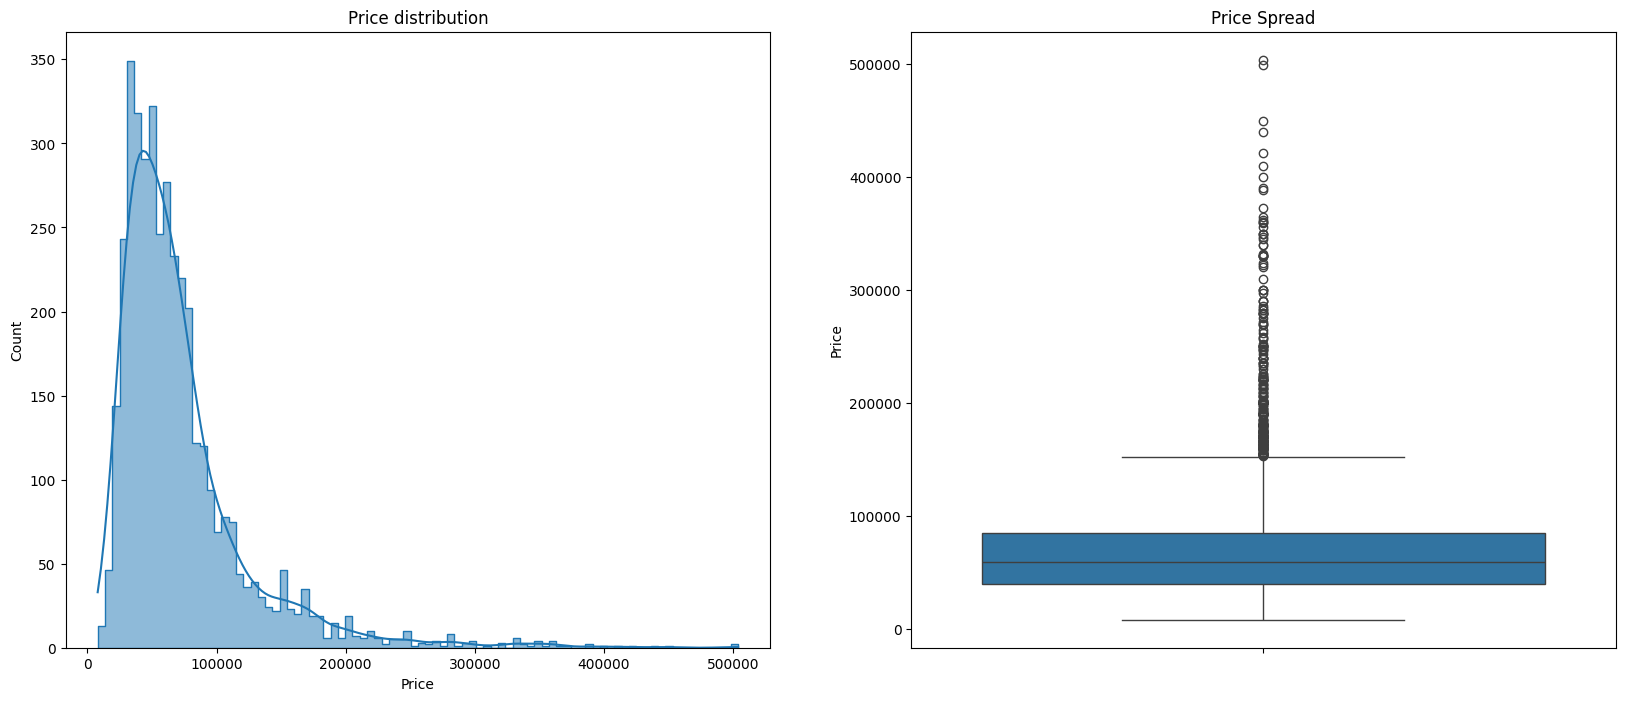

In [32]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Price distribution')
sns.histplot(df.Price, kde=True, element='step')

plt.subplot(1,2,2)
sns.boxplot(df.Price)
plt.title('Price Spread')

plt.show()

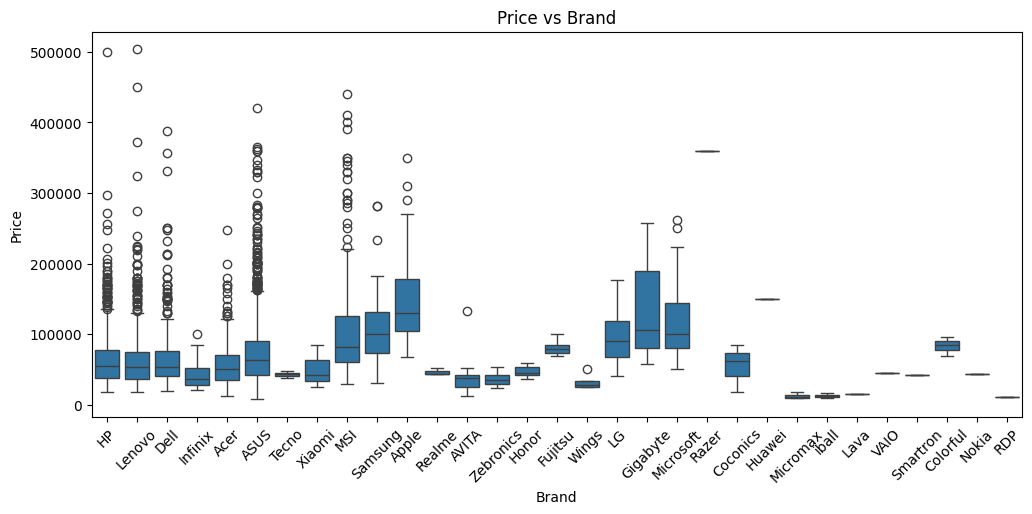

In [29]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='Brand', y='Price', data=df)
plt.xticks(rotation=45)
plt.title("Price vs Brand")
plt.show()

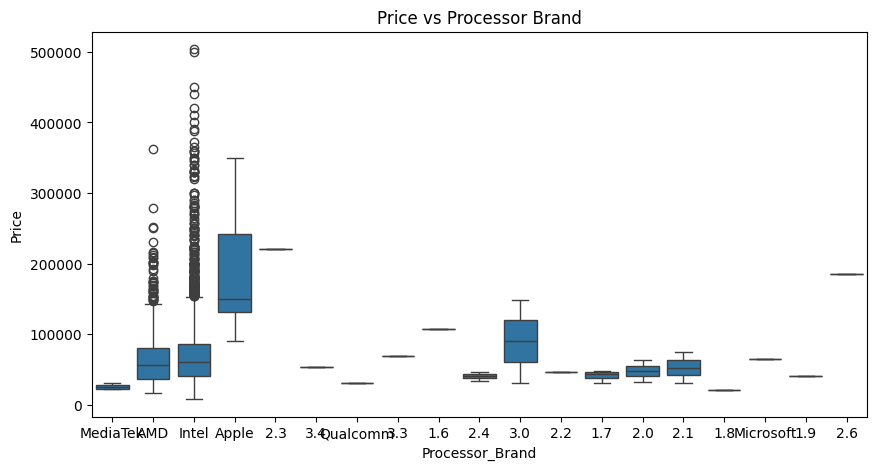

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Processor_Brand', y='Price', data=df)
plt.title("Price vs Processor Brand")
plt.show()

[Text(0.5, 0, 'brand'), Text(0, 0.5, 'Frequency of brand')]

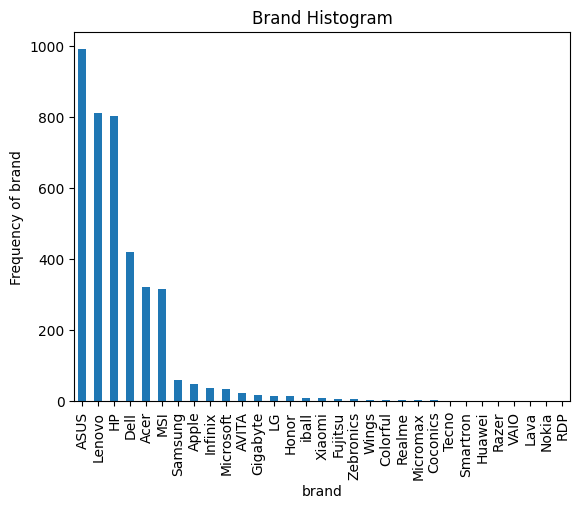

In [33]:
plt1 = df['Brand'].value_counts().plot(kind='bar')
plt.title('Brand Histogram')
plt1.set(xlabel = 'brand', ylabel='Frequency of brand')
